## Cars24 is one of the leading used car buying and selling platform in India

As the pricing data scientist is workign at Cars24, you are given a task

## Task: To automate the process of estimating price of the used car

## What data would we require?

1) Make/Brand
2) Model
3) year of Manufacturing
4) Interior and Exterior Condition
5) Odometer Rating
6) Engine Transformation
7) Degree of documentation
8) Location of car?(eg.. Diesel cars in Delhi region < 10 Years)
9) Selling Prices

Let's represent the features ( predictor variables ) using a vector X

                                    X = [ Brand, Model, Year, ShowroomPrice, Transmission,..]
hwere x1 is Brand, x2 denotes Model, and xn denotes the nth Features

Let's represent the selling_price or the largest variable using y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 2.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\Srija\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
m=np.arange(1,5)
m

NameError: name 'np' is not defined

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv")
display(df.columns)
display(df.sample(frac=1).head()) # sample randomy instead of looking at the first 5 rows
display(df.shape)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1774,Hyundai Xcent 1.2 Kappa AT S Option,Chennai,2015,53000,Petrol,Automatic,Second,16.9 kmpl,1197 CC,81.86 bhp,5.0,NaN,4.00
2740,Honda Civic 2006-2010 1.8 S MT,Ahmedabad,2009,89000,Petrol,Manual,First,13.5 kmpl,1799 CC,130 bhp,5.0,NaN,4.25
5503,Maruti Swift Dzire VDI,Mumbai,2012,80753,Diesel,Manual,Second,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,4.50
338,Tata Manza ELAN Quadrajet BS IV,Pune,2012,73000,Diesel,Manual,First,21.12 kmpl,1248 CC,88.8 bhp,5.0,NaN,3.40
2483,Toyota Innova 2.5 V Diesel 7-seater,Delhi,2011,72000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,7.10


(6019, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [9]:
m = df['Seats'].mean()
df['Seats'] = df['Seats'].fillna(value=m)


In [14]:
df.drop('New_Price',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [18]:
df['Mileage'].fillna(value='5.0kmpl',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [23]:
df['Engine'].fillna(value='1000CC',inplace=True)
df['Power'].fillna(value='70bhp', inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   object 
 8   Engine             6019 non-null   object 
 9   Power              6019 non-null   object 
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [25]:
display(df.describe())

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.806012,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<Axes: >

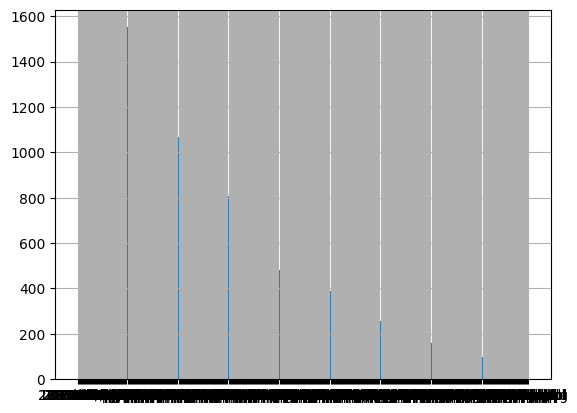

In [26]:
df['Mileage'].hist()

<Axes: >

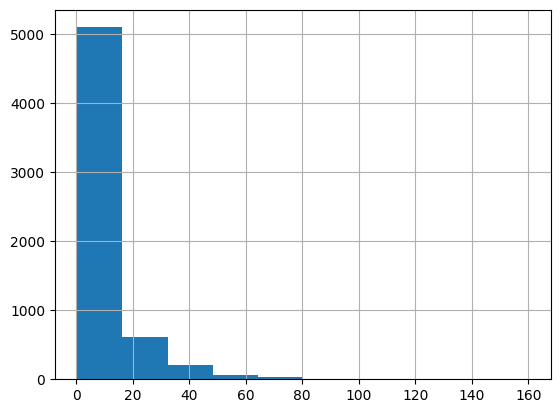

In [27]:
df['Price'].hist()

In [32]:
df['Mileage']=df['Mileage'].str.replace('kmpl','')
df['Mileage']=pd.to_numeric(df['Mileage'])
display(df.sample(frac=1).head())

ValueError: Unable to parse string "26.6 km/kg" at position 0

In [33]:
#Copied from chatgpt
# Remove any non-numeric characters (e.g., letters and symbols) and extra spaces
df['Mileage'] = df['Mileage'].str.replace(r'[^\d.]+', '', regex=True)

# Convert to numeric
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Display a sample of the DataFrame
display(df.sample(frac=1).head())


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4717,Hyundai Xcent 1.2 Kappa Base,Ahmedabad,2015,23000,Petrol,Manual,First,19.10,1197 CC,82 bhp,5.0,4.90
1797,Toyota Etios Liva 1.2 VX Dual Tone,Coimbatore,2019,20877,Petrol,Manual,First,18.16,1197 CC,78.9 bhp,5.0,7.27
3072,Hyundai EON Era Plus,Pune,2015,66510,Petrol,Manual,First,21.10,814 CC,55.2 bhp,5.0,2.95
2352,Renault Duster 110PS Diesel RxZ,Bangalore,2014,74500,Diesel,Manual,First,19.01,1461 CC,108.45 bhp,5.0,7.95
1952,Honda Civic 2006-2010 1.8 V AT,Bangalore,2011,72000,Petrol,Automatic,Second,12.90,1799 CC,130 bhp,5.0,5.50


<Axes: >

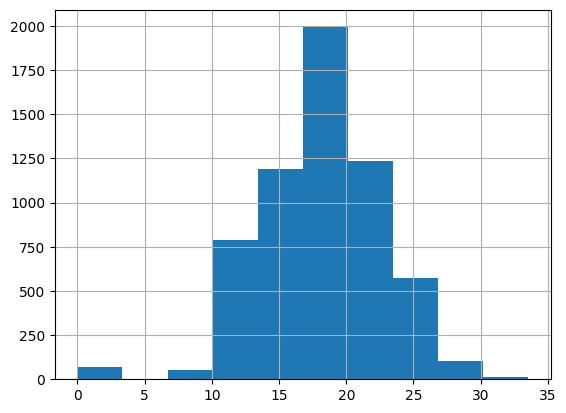

In [34]:
df['Mileage'].hist()

## How many records have 0 Mileage in the data ?

In [35]:
df[df['Mileage']==0.0].shape

(68, 12)

In [36]:
df.shape

(6019, 12)

In [37]:
#So basically 68 of them are having 0.0 as Mileage so if we drop just 68 out of 6019 it doesn't make a very big change 


In [38]:
df=df.drop(df[df['Mileage']==0.0].index,axis=0) #df=df() functional programming,can use inplace=True here too


## How are these numeric variables related to the target variable ?


In [42]:

plt.figure(figsize=(10, 8))  # Optional: adjust figure size for readability
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  # Note: "YlGnBu" (Yellow-Green-Blue) is the correct spelling
plt.show()


ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'

<Figure size 1000x800 with 0 Axes>

In [43]:
#Splitting Name to Full name and Model name 

In [44]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [46]:
df['make']=df.Name.apply(lambda x : x.split()[0])
df['model']=df.Name.apply(lambda x : " ".join(x.split()[1:]))
df.sample(frac=1).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,make,model
1021,Volkswagen Polo Diesel Highline 1.2L,Chennai,2013,60000,Diesel,Manual,First,22.07,1199 CC,73.9 bhp,5.0,4.75,Volkswagen,Polo Diesel Highline 1.2L
2525,Maruti Wagon R LXI BSIII,Hyderabad,2007,84169,Petrol,Manual,First,14.00,1061 CC,64 bhp,5.0,2.20,Maruti,Wagon R LXI BSIII
1164,Maruti SX4 S Cross DDiS 320 Zeta,Chennai,2015,73000,Diesel,Manual,First,22.70,1598 CC,118 bhp,5.0,8.25,Maruti,SX4 S Cross DDiS 320 Zeta
1537,Audi Q5 2008-2012 3.0 TDI,Chennai,2014,25000,Diesel,Automatic,First,12.19,2967 CC,236 bhp,5.0,44.00,Audi,Q5 2008-2012 3.0 TDI
4606,Maruti Zen LXi - BS III,Hyderabad,2006,80000,Petrol,Manual,Second,17.30,993 CC,60 bhp,5.0,1.20,Maruti,Zen LXi - BS III


In [48]:
df=df.drop("Name",axis=1)

In [49]:
df.sample(frac=1).head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,make,model
4334,Coimbatore,2017,38712,Petrol,Manual,First,18.90,1197 CC,81.86 bhp,5.0,5.87,Hyundai,Grand i10 1.2 Kappa Sportz
4486,Coimbatore,2014,102865,Diesel,Automatic,First,12.07,2967 CC,241.4 bhp,7.0,30.50,Audi,Q7 3.0 TDI Quattro Technology
1880,Pune,2012,78000,Diesel,Manual,First,17.80,1399 CC,68 bhp,5.0,2.80,Ford,Fiesta 1.4 Duratorq ZXI
4684,Bangalore,2011,64000,Petrol,Manual,First,19.70,796 CC,46.3 bhp,5.0,2.39,Maruti,Alto LXi BSIII
3623,Hyderabad,2007,52195,Petrol,Manual,First,19.70,796 CC,46.3 bhp,5.0,1.75,Maruti,Alto LXi


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5951 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5951 non-null   object 
 1   Year               5951 non-null   int64  
 2   Kilometers_Driven  5951 non-null   int64  
 3   Fuel_Type          5951 non-null   object 
 4   Transmission       5951 non-null   object 
 5   Owner_Type         5951 non-null   object 
 6   Mileage            5951 non-null   float64
 7   Engine             5951 non-null   object 
 8   Power              5951 non-null   object 
 9   Seats              5951 non-null   float64
 10  Price              5951 non-null   float64
 11  make               5951 non-null   object 
 12  model              5951 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 650.9+ KB


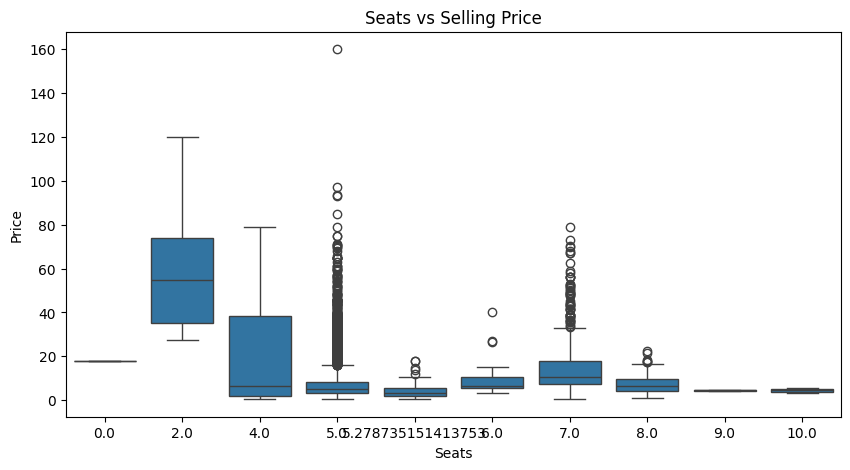

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Price',x='Seats',data=df)
plt.title("Seats vs Selling Price")
plt.show()

In [54]:
def seats_category(num):
    coupe=list([2.0,4.0])
    family=list(range(5,8))
    large=list(range(8,15))
    if num in coupe:
        return 'coupe'
    elif num in family:
        return 'family'
    else:
        return 'large'
df['seats_type'] = df.Seats.apply(seats_category)
df.sample(frac=1).head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,make,model,seats_type
3576,Hyderabad,2016,71000,Diesel,Manual,First,25.83,1498 CC,99 bhp,5.0,5.10,Ford,Figo 2015-2019 1.5D Titanium MT,family
1227,Pune,2013,49000,Petrol,Automatic,First,14.59,1997 CC,245 bhp,5.0,19.00,BMW,3 Series 328i Sport Line,family
4404,Hyderabad,2015,60000,Diesel,Automatic,First,17.11,1968 CC,174.33 bhp,5.0,25.00,Audi,A4 35 TDI Premium,family
5941,Pune,2018,1000,Petrol,Manual,First,25.17,799 CC,53.3 bhp,5.0,3.40,Renault,KWID RXL,family
1288,Kochi,2014,14262,Petrol,Automatic,First,9.90,1984 CC,207.8 bhp,2.0,27.35,Audi,TT 2.0 TFSI,coupe


## How many categories of 'make' in the data?

In [55]:
len(df['make'].unique())

30

## What are the item counts for different 'make' ?

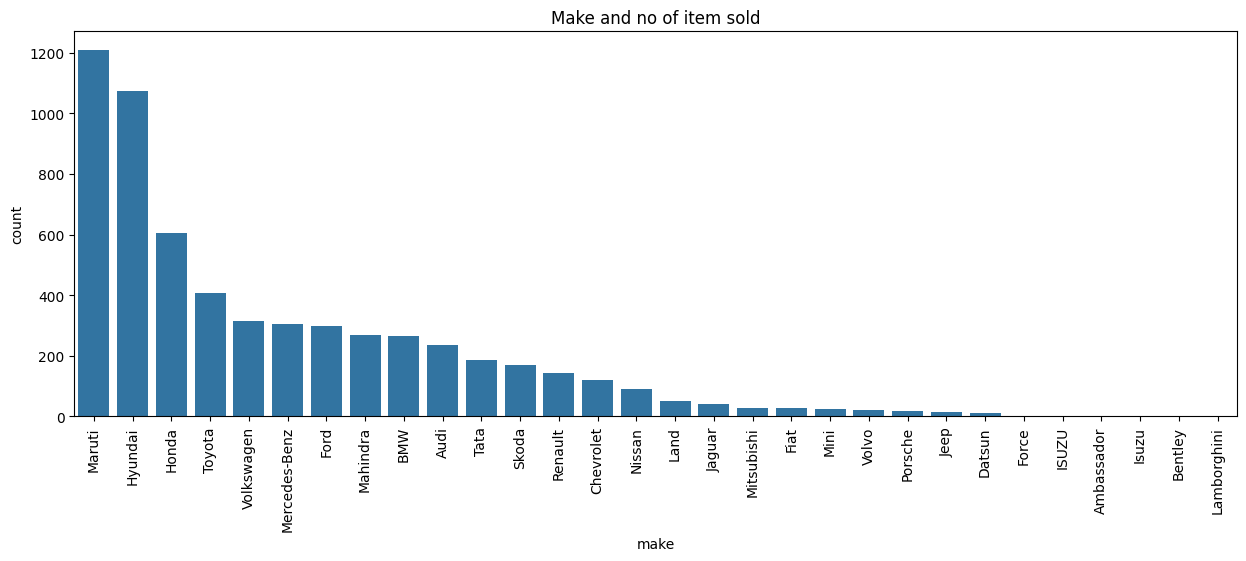

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(x='make',data=df,order=df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Make and no of item sold")
plt.show()

## TODO : Should we make a feature related to the 'count' of the 'make' ? How do we decide if we should?

In [57]:
#How is 'make' related to the selling price?

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(y='log_selling_prices',x='make',data=df,order=df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Selling Price for different make")
plt.show()

ValueError: Could not interpret value `log_selling_prices` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x500 with 0 Axes>

In [59]:
plt.figure(figsize=(15,5))
# Drop NaN values
df = df.dropna(subset=['log_selling_prices', 'make'])

# Create the boxplot
sns.boxplot(y='log_selling_prices', x='make', data=df, order=df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Selling Price for Different Makes")
plt.show()


KeyError: ['log_selling_prices']

<Figure size 1500x500 with 0 Axes>

In [60]:
#Since Machine Learning models are unabale to undertsand text so we have to convert it to numerical formate

## How can we encode variables with two categories (levels=2)?

In [61]:
# explains how two category variables can be encoded as a binary variable
transmission_dummy =pd.get_dummies(df['Transmission'])
df=pd.concat([df,transmission_dummy],axis=1)
df=df.drop(['Transmission','Automatic'],axis=1)
df=df.rename(columns={'Manual':'Transmission'})
df.sample(frac=1).head()
#Transmission is converted into Automatic and Manual is convert in 0 and 1 

,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,make,model,seats_type,Transmission
5283,Mumbai,2014,13710,Petrol,First,16.2,1199 CC,74 bhp,5.0,4.75,Volkswagen,Polo 1.2 MPI Highline,family,True
5899,Mumbai,2013,65000,Diesel,Second,19.3,1248 CC,73.9 bhp,5.0,4.99,Maruti,Swift Dzire Vdi BSIV,family,True
4153,Bangalore,2011,34000,Petrol,Second,10.5,1796 CC,157.7 bhp,5.0,19.00,Mercedes-Benz,E-Class 200 Kompressor Elegance,family,False
1964,Hyderabad,2006,71993,Petrol,First,19.7,796 CC,46.3 bhp,5.0,1.80,Maruti,Alto LXi BSIII,family,True
2528,Delhi,2016,59000,Diesel,First,18.0,2993 CC,255 bhp,7.0,36.75,Land,Rover Discovery SE 3.0 TD6,family,False


## How do we encode variables with multiple categories (levels<5)?


In [62]:
seats_type_dummy=pd.get_dummies(df['seats_type'],prefix='Seats')
seats_type_dummy.sample(frac=1).head()

,Seats_coupe,Seats_family,Seats_large
5687,False,True,False
2651,False,True,False
1007,False,True,False
3303,False,True,False
3349,False,True,False


In [63]:
#It will be seperated into 3 different columns and whcihever value is present is assigned as True and rest as False

In [64]:
df=pd.concat([df,seats_type_dummy],axis=1)
df=df.drop(['seats_type'],axis=1)

In [71]:
df.sample(frac=1).head()

,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,make,...,Seats_family,Seats_large,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
3478,Mumbai,2013,40000,Second,22.70,1582 CC,126.24 bhp,5.0,6.95,Hyundai,...,True,False,True,False,False,False,True,False,False,False
1474,Coimbatore,2019,17705,First,21.40,1197 CC,83.1 bhp,5.0,8.70,Maruti,...,True,False,False,False,False,True,False,False,False,True
265,Bangalore,2014,57000,Second,15.80,2148 CC,170 bhp,5.0,18.00,Mercedes-Benz,...,True,False,True,False,False,False,True,False,False,False
2987,Mumbai,2014,9000,Second,17.01,1591 CC,121.3 bhp,5.0,5.50,Hyundai,...,True,False,False,False,False,True,False,False,False,True
4907,Ahmedabad,2017,29000,First,17.40,1497 CC,117.3 bhp,5.0,10.00,Honda,...,True,False,False,False,False,True,False,False,False,True


In [69]:
Fuel_type_dummy=pd.get_dummies(df['Fuel_Type'],prefix='Fuel')
Fuel_type_dummy.sample(frac=1).head()
df=pd.concat([df,Fuel_type_dummy],axis=1)
df=df.drop(['Fuel_Type'],axis=1)
df.sample(frac=1).head()

,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,make,...,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
2240,Hyderabad,2014,60000,First,16.55,1968 CC,147.51 bhp,5.0,24.00,Audi,...,False,True,False,False,False,False,True,False,False,False
4297,Mumbai,2014,68400,First,12.98,2494 CC,178.4 bhp,5.0,13.50,Toyota,...,False,False,False,False,True,False,False,False,False,True
2375,Jaipur,2009,65000,Second,19.00,998 CC,66.1 bhp,5.0,2.05,Maruti,...,False,False,False,False,True,False,False,False,False,True
4095,Coimbatore,2015,35463,First,14.94,2967 CC,241.4 bhp,5.0,25.02,Audi,...,False,True,False,False,False,False,True,False,False,False
4363,Mumbai,2007,66000,First,11.10,2354 CC,158.8 bhp,5.0,3.70,Honda,...,False,False,False,False,True,False,False,False,False,True


In [70]:
df=df.drop(['Fuel_CNG'],axis=1)
#df=df.drop(['Fuel_Diesel'],axis=1)
#df=df.drop(['Fuel_Type'],axis=1)
#df=df.drop(['Fuel_Type'],axis=1)
#df=df.drop(['Fuel_Type'],axis=1)
df.sample(frac=1).head()

,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,make,...,Seats_family,Seats_large,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
2696,Coimbatore,2017,24806,First,18.15,1198 CC,82 bhp,6.0,5.60,Mahindra,...,True,False,False,False,False,True,False,False,False,True
3877,Hyderabad,2008,76206,First,17.80,1248 CC,75 bhp,5.0,4.25,Maruti,...,True,False,True,False,False,False,True,False,False,False
471,Delhi,2013,69000,First,12.55,2982 CC,169 bhp,7.0,14.45,Toyota,...,True,False,True,False,False,False,True,False,False,False
4354,Delhi,2012,72351,First,23.59,1364 CC,null bhp,5.0,2.65,Toyota,...,True,False,True,False,False,False,True,False,False,False
5046,Coimbatore,2012,94989,First,12.80,2354 CC,177.6 bhp,5.0,6.58,Honda,...,True,False,False,False,False,True,False,False,False,True


In [74]:
Location_type_dummy=pd.get_dummies(df['Location'],prefix='location')
Location_type_dummy.sample(frac=1).head()
df=pd.concat([df,Location_type_dummy],axis=1)
df=df.drop(['Location'],axis=1)
df.sample(frac=1).head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,make,model,...,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune
4350,2019,31271,First,13.68,2393 CC,147.8 bhp,8.0,21.42,Toyota,Innova Crysta 2.4 VX MT 8S,...,False,False,True,False,False,False,False,False,False,False
212,2014,30000,First,20.46,1461 CC,83.8 bhp,5.0,5.95,Renault,Duster 85PS Diesel RxL Optional,...,False,False,False,False,False,False,False,False,True,False
2389,2018,24500,First,16.00,2179 CC,140 bhp,7.0,16.52,Mahindra,XUV500 AT W10 FWD,...,False,False,True,False,False,False,False,False,False,False
1396,2010,52000,Second,19.81,1086 CC,68.05 bhp,5.0,2.25,Hyundai,i10 Era 1.1 iTech SE,...,False,False,False,False,False,True,False,False,False,False
5400,2014,69000,First,22.70,1498 CC,89.84 bhp,5.0,5.45,Ford,Ecosport 1.5 DV5 MT Titanium Optional,...,False,False,False,True,False,False,False,False,False,False


In [75]:
df['Power'] = df['Power'].str.replace(r'[^\d.]+', '', regex=True)
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
display(df.sample(frac=1).head())

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,make,model,...,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune
4756,2010,35010,First,12.40,2698 CC,179.50,5.0,11.50,Audi,A6 2.7 TDI,...,False,False,False,False,False,False,False,True,False,False
5007,2013,87192,First,25.20,1248 CC,74.00,5.0,4.35,Maruti,Swift VDI BSIV,...,False,True,False,False,False,False,False,False,False,False
4923,2015,28500,First,19.49,1198 CC,67.04,5.0,3.50,Nissan,Micra Active XV S,...,False,False,False,True,False,False,False,False,False,False
5053,2011,86000,First,11.50,2982 CC,171.00,7.0,11.50,Toyota,Fortuner 3.0 Diesel,...,False,False,False,True,False,False,False,False,False,False
3455,2014,41000,First,26.20,998 CC,58.20,5.0,3.50,Maruti,Wagon R LXI CNG,...,False,False,False,False,False,False,False,False,True,False


In [79]:
df['Engine']=df['Engine'].str.replace(r'[^\d.]+', '', regex=True)
df['Engine']=pd.to_numeric(df['Engine'],errors='coerce')
display(df.sample(frac=1).head())

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,make,model,...,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune
731,2017,14000,First,24.00,1186,73.97,5.0,4.90,Hyundai,Grand i10 1.2 CRDi Magna,...,False,False,False,False,False,False,False,True,False,False
2307,2008,68000,Third,19.70,796,46.30,5.0,1.20,Maruti,Alto LXi BSIII,...,False,True,False,False,False,False,False,False,False,False
1885,2018,6000,First,11.00,2987,258.00,7.0,79.00,Mercedes-Benz,GLS 350d Grand Edition,...,False,False,False,True,False,False,False,False,False,False
2304,2015,49000,First,17.05,1995,184.00,5.0,22.99,BMW,X1 sDrive 20d Sportline,...,False,False,False,True,False,False,False,False,False,False
2158,2014,58000,First,21.79,1248,88.73,5.0,4.50,Maruti,SX4 ZDI,...,False,False,False,False,False,False,False,False,False,False


In [80]:
Owner_Type_dummy=pd.get_dummies(df['Owner_Type'],prefix='Owner')
Owner_Type_dummy.sample(frac=1).head()
df=pd.concat([df,Owner_Type_dummy],axis=1)
df=df.drop(['Owner_Type'],axis=1)
df.sample(frac=1).head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,make,model,Transmission,...,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third
2566,2014,45128,12.05,2179,120.0,8.0,6.75,Mahindra,Scorpio VLX 2WD BSIV,True,...,False,False,False,True,False,False,True,False,False,False
2633,2014,48104,17.40,1497,117.3,5.0,5.49,Honda,City i VTEC SV,True,...,False,False,False,True,False,False,True,False,False,False
4163,2017,53841,11.36,2755,171.5,7.0,20.50,Toyota,Innova Crysta 2.8 ZX AT,False,...,False,False,False,False,False,False,True,False,False,False
3571,2011,65000,17.00,1497,118.0,5.0,5.20,Honda,City 1.5 V MT,True,...,False,False,False,False,False,False,True,False,False,False
3903,2011,66276,17.00,1497,118.0,5.0,5.50,Honda,City 1.5 V MT,True,...,True,False,False,False,False,False,True,False,False,False


In [72]:
df.shape

(5951, 23)

In [81]:
df.to_csv("cars24_clean.csv",index=False)

In [82]:
df.to_csv("cars24_new_clean.csv",index=False)